## Análisis de datos - Clase 6

#### Técnicas de extracción de features
### PCA - LDA - t-SNE - UMAP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

### Dataset Iris

In [2]:
# Dataset Iris
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

# Separo en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizo los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Principal Component Analysis (PCA)

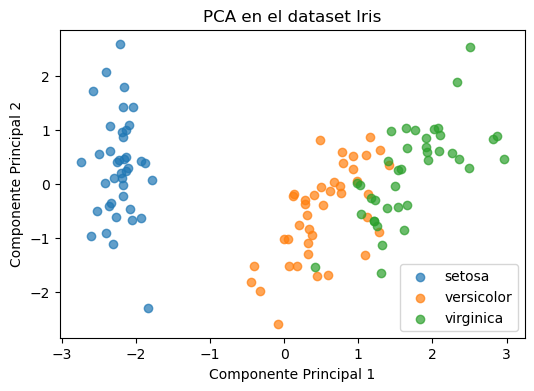

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(6, 4))
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.title("PCA en el dataset Iris")
plt.show()


In [4]:
print(pca.explained_variance_ratio_)  # % de varianza capturada por cada componente

[0.72551423 0.23000922]


In [5]:
df_pca = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y_train
df_pca

,PCA1,PCA2,target
0,-2.741058,0.415798,0
1,-2.214577,2.604762,0
2,0.926828,0.529167,1
3,-2.293429,0.108078,0
4,-2.524548,-0.496938,0
...,...,...,...
115,0.521362,-0.385743,1
116,0.415127,-1.535405,2
117,-2.159999,1.811532,0
118,0.377947,-0.947346,1


### 2. Linear Discriminant Analysis (LDA)

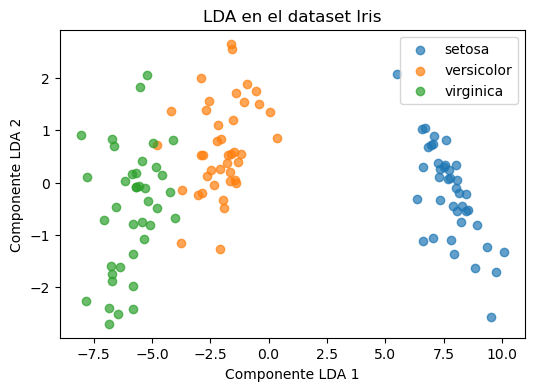

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train_scaled, y_train)

plt.figure(figsize=(6, 4))
for i, target_name in enumerate(target_names):
    plt.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente LDA 1")
plt.ylabel("Componente LDA 2")
plt.legend()
plt.title("LDA en el dataset Iris")
plt.show()

#### Porcentaje de varianza capturada por cada componente

In [7]:
print(lda.explained_variance_ratio_)

[0.99229795 0.00770205]


#### Silhouette Score

Qué tan bien separadas están las clases:
- Cercano a 1: Las clases están bien separadas.
- Cerca de 0: Hay solapamiento entre clases.
- Negativo: Los puntos están mal asignados a grupos.

In [8]:
sil_score = silhouette_score(X_lda, y_train)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.64


In [9]:
df_lda = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
df_lda['target'] = y_train
df_lda

,LDA1,LDA2,target
0,8.911102,-0.802091,0
1,9.525179,-2.563805,0
2,-1.380277,0.000011,1
3,7.303022,0.097825,0
4,7.334804,0.266847,0
...,...,...,...
115,-1.193730,0.542204,1
116,-4.812226,0.287415,2
117,10.071633,-1.324683,0
118,-1.528119,1.188882,1


### 3.t-Distributed Stochastic Neighbor Embedding (t-SNE)

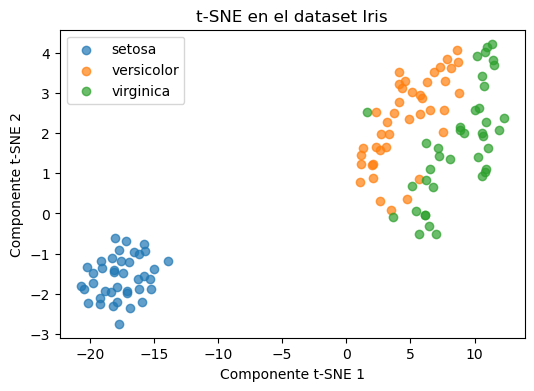

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42) # perplexity indica la cantidad de vecinos a considerar (5-10 es baja y preserva estructura local, 30-50 es alta y preserva estructura global)
X_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(6, 4))
for i, target_name in enumerate(target_names):
    plt.scatter(X_tsne[y_train == i, 0], X_tsne[y_train == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.legend()
plt.title("t-SNE en el dataset Iris")
plt.show()

### 4. Uniform Manifold Approximation and Projection (UMAP)

In [11]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

2025-09-30 10:13:17.503701: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


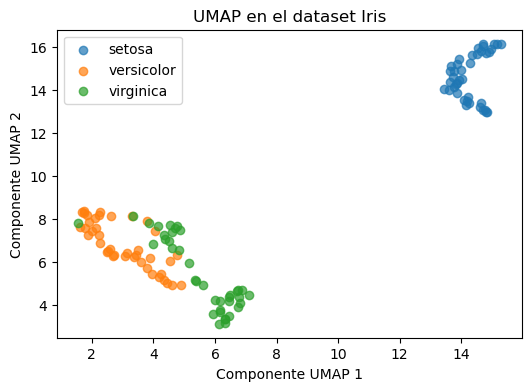

In [12]:
import umap

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_train_scaled)

plt.figure(figsize=(6, 4))
for i, target_name in enumerate(target_names):
    plt.scatter(X_umap[y_train == i, 0], X_umap[y_train == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente UMAP 1")
plt.ylabel("Componente UMAP 2")
plt.legend()
plt.title("UMAP en el dataset Iris")
plt.show()

In [13]:
sil_score = silhouette_score(X_umap, y_train)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.50


In [14]:
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['target'] = y_train
df_umap

,UMAP1,UMAP2,target
0,13.429479,14.035129,0
1,14.798853,12.947398,0
2,4.168499,5.275931,1
3,13.851451,15.181764,0
4,14.789231,15.722351,0
...,...,...,...
115,3.139918,6.434729,1
116,1.552841,7.810706,2
117,14.701468,13.035758,0
118,2.000383,7.419821,1
